# Feature importance

In [2]:
import numpy as np
import matplotlib
matplotlib.use("module://matplotlib_inline.backend_inline")
import matplotlib.pyplot as plt

import seaborn as sns
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import pickle
from functools import cached_property

plt.style.use("seaborn-v0_8-whitegrid")
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "rmfamily"
})
plt.rcParams['text.latex.preamble'] = r'\usepackage{{amsmath}}'


In [3]:
reference_day = pd.Timestamp("2018-01-01")

#location_min = np.array([16.1, 72.8])
location_min = np.array([12.587, 76.770])

class DataPreprocessor:
    def __init__(self, df, covariate_cols, y_col):
        self.df = df
        self.covariate_cols = covariate_cols
        self.y_col = y_col

    @cached_property
    def normalization_bounds(self):
        normalization_bounds = dict()
        for column in self.df.columns:
            if self.df[column].dtype.kind in 'iuf':
                col_min = self.df[column].min()
                col_max = self.df[column].max()
                normalization_bounds[column] = col_min, col_max
        return normalization_bounds

    def normalize(self, array, col_name):
        norm_min, norm_max = self.normalization_bounds[col_name]
        return (array - norm_min) / (norm_max - norm_min) * 2 - 1

    def prepare_space_coords(self, df):
        X = df[["latitude", "longitude"]] - location_min
        return X

    def prepare_time_coords(self, df):
        X = df["date"] / 365
        return X

    def prepare_covariates(self, df):
        X = pd.DataFrame()#np.empty((len(df), 0), dtype=float)
        for i, covariate_col in enumerate(self.covariate_cols):
            col_array = df[covariate_col]
            col_array = self.normalize(col_array, covariate_col)
            X[covariate_col] = col_array
        return X

    def get_X(self, df):
        X = pd.DataFrame()
        X[["t_lat", "t_lon"]] = self.prepare_space_coords(df)
        X["time"] = self.prepare_time_coords(df)
        X[self.covariate_cols] = self.prepare_covariates(df)
        return X

    def get_XY(self, df):
        XY = self.get_X(df)
        XY[self.y_col] = df[self.y_col]
        return XY

    def get_X_numpy(self, df):
        return self.get_X(df).to_numpy(copy=True)

    def get_Y_numpy(self, df):
        return df[self.y_col].to_numpy(copy=True)



def destandardize_date(days):
    return reference_day + pd.Timedelta(days=days)

def beauty_print_date(date):
    return date.strftime("%d %B %Y")

def tech_print_date(date):
    return date.strftime("%Y_%m_%d")

def standardize_location(location):
    return location - location_min

pass

In [4]:
df = pd.read_feather('data/combined_synthetic1.feather')

variables = [
    "temperature",
    "relative_humidity",
    "solar_radiation",
    "total_evaporation_sum",
    "wind_speed",
    "surface_pressure",
    "precipitation",
    "leaf_area_index_high_vegetation",
    "leaf_area_index_low_vegetation",
]

suffixes = [] #[""]

for lag_i in range(1, 30):
    suffixes.append(f"_l{lag_i}")

vars = []
for var in variables:
    for suffix in suffixes:
        vars.append(var+suffix)

In [5]:
vars

['temperature_l1',
 'temperature_l2',
 'temperature_l3',
 'temperature_l4',
 'temperature_l5',
 'temperature_l6',
 'temperature_l7',
 'temperature_l8',
 'temperature_l9',
 'temperature_l10',
 'temperature_l11',
 'temperature_l12',
 'temperature_l13',
 'temperature_l14',
 'temperature_l15',
 'temperature_l16',
 'temperature_l17',
 'temperature_l18',
 'temperature_l19',
 'temperature_l20',
 'temperature_l21',
 'temperature_l22',
 'temperature_l23',
 'temperature_l24',
 'temperature_l25',
 'temperature_l26',
 'temperature_l27',
 'temperature_l28',
 'temperature_l29',
 'relative_humidity_l1',
 'relative_humidity_l2',
 'relative_humidity_l3',
 'relative_humidity_l4',
 'relative_humidity_l5',
 'relative_humidity_l6',
 'relative_humidity_l7',
 'relative_humidity_l8',
 'relative_humidity_l9',
 'relative_humidity_l10',
 'relative_humidity_l11',
 'relative_humidity_l12',
 'relative_humidity_l13',
 'relative_humidity_l14',
 'relative_humidity_l15',
 'relative_humidity_l16',
 'relative_humidity_l1

In [6]:
data_preprocessor = DataPreprocessor(df, vars, "presence")
XY = data_preprocessor.get_XY(df)

/tmp/ipykernel_642619/3281460013.py:39: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X[covariate_col] = col_array
/tmp/ipykernel_642619/3281460013.py:39: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X[covariate_col] = col_array
/tmp/ipykernel_642619/3281460013.py:39: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = f

In [7]:
XY["id"] = XY.index

/tmp/ipykernel_642619/1103536891.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  XY["id"] = XY.index


In [8]:
XY

,t_lat,t_lon,time,temperature_l1,temperature_l2,temperature_l3,temperature_l4,temperature_l5,temperature_l6,temperature_l7,...,leaf_area_index_low_vegetation_l22,leaf_area_index_low_vegetation_l23,leaf_area_index_low_vegetation_l24,leaf_area_index_low_vegetation_l25,leaf_area_index_low_vegetation_l26,leaf_area_index_low_vegetation_l27,leaf_area_index_low_vegetation_l28,leaf_area_index_low_vegetation_l29,presence,id
23250,2.017992,0.570442,-0.019178,-0.353350,-0.313870,-0.342913,-0.348602,-0.339500,-0.268181,-0.165016,...,-0.640949,-0.641552,-0.642080,-0.642680,-0.643274,-0.643718,-0.642174,-0.640632,0,23250
54527,1.309172,1.576049,-0.019178,-0.568071,-0.491510,-0.438356,-0.475880,-0.509062,-0.429467,-0.401584,...,-0.089461,-0.088236,-0.086870,-0.085587,-0.084311,-0.082846,-0.076067,-0.069277,1,54527
61097,3.300771,3.244302,-0.019178,-0.210914,-0.219502,-0.204868,-0.221046,-0.274746,-0.172649,-0.063589,...,-0.000860,-0.003427,-0.005980,-0.008520,-0.011049,-0.013355,-0.009947,-0.006554,0,61097
47016,4.301213,4.535005,-0.019178,-0.232801,-0.265450,-0.249928,-0.251270,-0.313974,-0.229509,-0.078745,...,0.335835,0.336276,0.336715,0.337156,0.337660,0.338304,0.346848,0.355325,0,47016
32374,1.794204,0.206776,-0.016438,-0.462509,-0.454829,-0.434573,-0.427425,-0.434301,-0.357714,-0.290247,...,-0.346186,-0.343992,-0.341810,-0.339639,-0.337480,-0.335191,-0.329047,-0.322887,1,32374
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51266,3.016431,1.200111,6.027397,-0.191577,-0.308209,-0.220826,-0.184310,-0.182600,-0.124501,-0.086252,...,-0.233747,-0.231925,-0.230184,-0.228381,-0.226682,-0.225277,-0.219385,-0.213555,0,51266
10867,1.286215,1.487444,6.027397,-0.429599,-0.605850,-0.399142,-0.372441,-0.364668,-0.329827,-0.264096,...,-0.226384,-0.224739,-0.223175,-0.221546,-0.219989,-0.217977,-0.211504,-0.204944,1,10867
45988,3.239743,1.610267,6.027397,-0.207343,-0.311592,-0.192646,-0.182953,-0.216720,-0.118049,-0.084518,...,-0.418796,-0.418939,-0.418933,-0.419003,-0.419043,-0.418285,-0.414156,-0.410021,0,45988
60365,3.823576,3.082395,6.027397,-0.187695,-0.242345,-0.194270,-0.230226,-0.267806,-0.173743,-0.108909,...,0.126991,0.128762,0.130600,0.132426,0.134259,0.138498,0.149264,0.160136,0,60365


In [9]:
XY_long = pd.wide_to_long(XY, stubnames=variables, i=["id"], j="var", suffix=r"_l\d+")

In [10]:
XY_average = XY_long.groupby("id").mean()

In [11]:
X = XY_average.drop(columns=["presence", "t_lat", "t_lon", "time"])
y = XY_average["presence"]

In [12]:
rf = RandomForestClassifier()
rf.fit(X, y)
pass

In [13]:
# Get feature importances
importances = rf.feature_importances_
feature_importances = pd.Series(importances, index=X.columns)
feature_importances.sort_values(ascending=False, inplace=True)

print(feature_importances)

temperature                        0.148596
precipitation                      0.138032
surface_pressure                   0.117546
leaf_area_index_low_vegetation     0.114001
wind_speed                         0.109337
relative_humidity                  0.105508
total_evaporation_sum              0.103711
solar_radiation                    0.101487
leaf_area_index_high_vegetation    0.061782
dtype: float64


<Axes: >

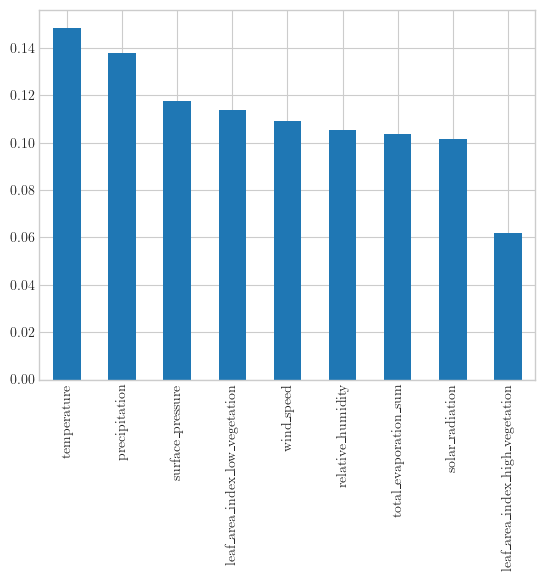

In [14]:
feature_importances.plot.bar()

In [15]:
log_reg = LogisticRegression(max_iter=1000, solver='liblinear')

# Fit the model
log_reg.fit(X, y)

LogisticRegression(max_iter=1000, solver='liblinear')

In [16]:
# Get feature coefficients
coefficients = log_reg.coef_[0]

# Create a DataFrame for better visualization
feature_coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': coefficients
})

# Sort the DataFrame by absolute value of coefficients
feature_coefficients['abs_coefficient'] = feature_coefficients['Coefficient'].abs()
feature_coefficients.sort_values(by='abs_coefficient', ascending=False, inplace=True)

# Drop the temporary 'abs_coefficient' column
feature_coefficients.drop(columns=['abs_coefficient'], inplace=True)

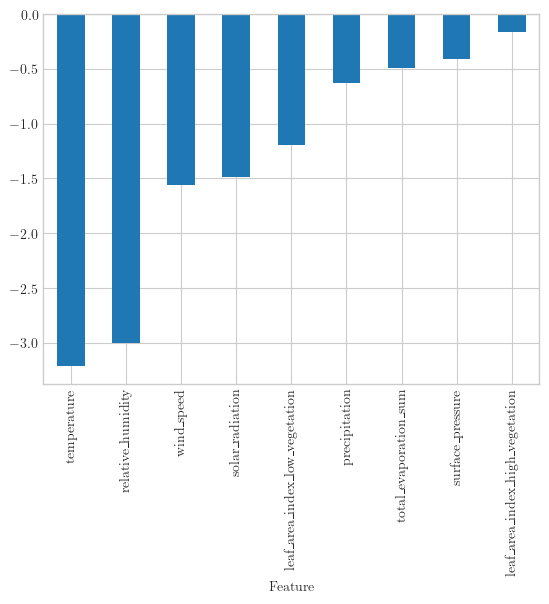

In [17]:
feature_coefficients.plot.bar(x="Feature", y="Coefficient")
plt.legend([])

In [ ]:
feature_coefficients

,Feature,Coefficient
4,wind_speed,1.875162
3,total_evaporation_sum,1.153488
5,surface_pressure,1.022666
2,solar_radiation,0.847401
0,temperature,-0.497818
1,relative_humidity,-0.211993
6,precipitation,-0.129014
7,leaf_area_index_high_vegetation,0.057104
8,leaf_area_index_low_vegetation,-0.042047
